# Network based automatic constraints

Our goal is to explore possibilities to implement 2D constraints in a flexible manner. General theory is available, most notable Lamars theorem that translate rigidity to graph properties. (ref https://hal.archives-ouvertes.fr/tel-01402691/document)

We will essentially with 2 graphs, one with curve incidences as edges and curves as vertices, which we call $G_c$. Obviously the angle will be a major property of edges in this graph. Also, we artificially make all parallel lines adjacent (imagine adding the infinity point). This is obviously another important edge property in $G_c$.

The second graph is the classical geometric connection graph with points as vertices and curves as edges, $G_p$. The kind of curve as well as the (line) distance are edge-properties.

We add two maps, between vertices in one graph and edges in the other:
$$\pi:\ G_c|E \mapsto G_p|V\,,$$
$$\sigma:\ G_p|E \mapsto G_c|V\,.$$
such that $\pi^{-1}$ maps points to all curve intersections happening there, while $\sigma^{-1}$ maps curves to all point-pairs on it.

Looking exclusively at $G_c$, we can determine angle constraints only (we transform parallel distances to angles dividing by some regularizing length, typically much larger than the system size). Selecting constraining edges/angles, cycles should be excluded and a priori all spanning trees are valid constraintset. Adding angle dependent weights, we can determine a minimal spanning tree, $g_c$, giving a desired constraint set. We conjecture that an appropriate weight function gives a sufficient space of constraints.

Alternative, the more classical approach of looking at points and distance dependent weighted connecting lines, we can determine a similar constraining sub-graph $g_p$. An import realization is that $g_p$ will depend on $g_c$ (indeed, every edge in $g_c$ eliminates the need for one in $g_p$) and the converse is also true: distance can fix angles and as such eliminate edges in $g_c$, which amounts to formally disconnecting $G_c$ by taking a weight to $\infty$.

In short, we want to solve a system:
$$G_c = graph(V =curves,E=intersections, weights = f(\pi^{-1}g_p)\,,$$
$$G_p = graph(V =points,E=lines, weights = \tilde f(\sigma^{-1}g_c) $$
which depend on each other:
$$g_c = MST(G_c(g_p))\,,\quad g_p =F(G_p(g_c))\,,$$
This is a coupled system without guarantee of convergence, but it might be worthwhile to try to bootstrap toward a fixed point. The nature of $F$ is bit obscure still... The functions $f$ and $\tilde f$ should contain all user/AI defined weights.

It seems that once we have an initial $g_c$ and $g_p$, triangles in $g_p$ will eliminate an angle. Conversely, if $g_p$ is a tree, it holds no hard restrictions on $g_c$ (but could still modify weights). 



Our reference heuristic is as follows:
- fix (most) horizontal/vertical set
- fix parallel/perpendicular
- horizontal/vertical distances
- angles to h/v set
- angles lines adjacent in G_c
- angles distance 2 in G_c
- longer distances

This amounts to getting a $g_c$ subgraph, a $g_p$ subgraph determining at best 90 angles already in $g_c$, complete $g_c$, complete $g_p$.
The middle two steps commute, so one couls simply do a MST on $G_c$ and then $G_p$. $g_p$ must be a spanning tree then!

In [1]:
from mycad import mycad
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import networkx as nx

In [2]:
cad=mycad()

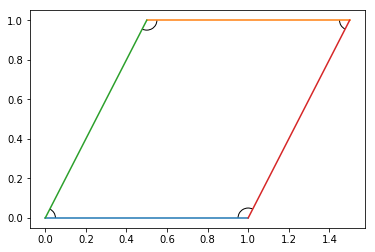

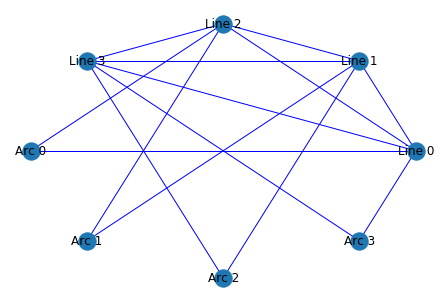

In [3]:
eps=0.0001
alpha=np.arctan(2)
alphac = np.pi-alpha
pgram = cad.new()
pgram.line([0,0],[1,0])
pgram.line([0.5,1],[1.5,1])
pgram.line([0,0],[0.5,1])
pgram.line([1,0],[1.5,1])
pgram.arc([0,0],[0.05,0],alpha+eps)
pgram.arc([0.5,1],[0.5-0.05/np.sqrt(5),1-0.05/np.sqrt(5)*2],alphac+eps)
pgram.arc([1.5,1],[1.45,1],alpha+eps)
pgram.arc([1,0],[1+0.05/np.sqrt(5),0.05/np.sqrt(5)*2],alphac+eps)
pgram.draw()
pgram.createGraph()

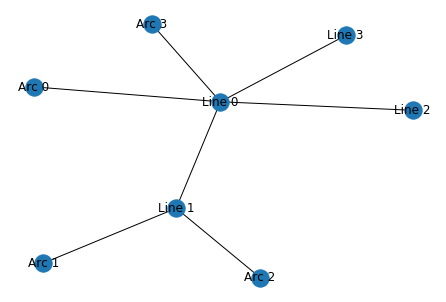

In [4]:
mst = nx.minimum_spanning_tree(pgram.graph)
nx.draw(mst,with_labels=True)

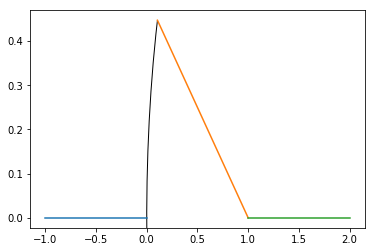

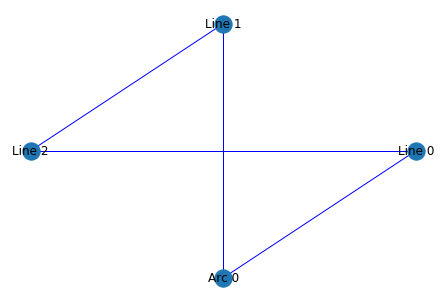

In [5]:
eps=0.0001
alpha=np.arctan(2)
alphac = np.pi-alpha
door = cad.new()
door.line([-1,0],[eps,0])
door.line([1-2/np.sqrt(5)-eps,1/np.sqrt(5)-eps],[1,0])
door.line([1,0],[2,0])
door.arc([1,0],[1-2/np.sqrt(5),1/np.sqrt(5)+eps],alpha)
door.draw()
door.createGraph()

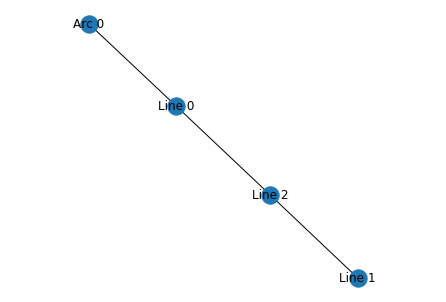

In [6]:
mst = nx.minimum_spanning_tree(door.graph)
nx.draw(mst,with_labels=True)

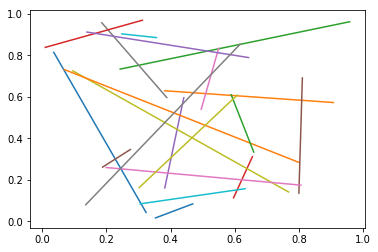

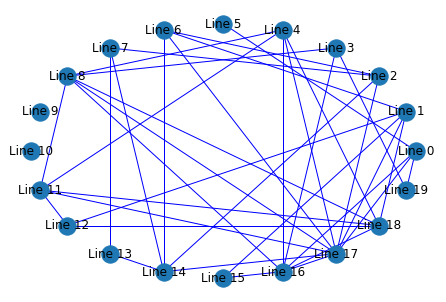

In [7]:
mikado = cad.new()
starts = np.random.rand(20,2)
ends = np.random.rand(20,2)
for s,e in zip(starts,ends):
    mikado.line(s,e)
mikado.draw()
mikado.createGraph()

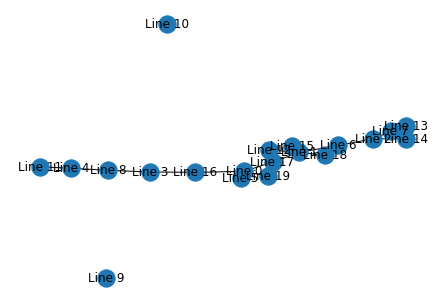

In [8]:
mst = nx.minimum_spanning_tree(mikado.graph)
nx.draw(mst,with_labels=True)